In [149]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import NAFFlib

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [150]:
data1 = np.loadtxt('thesis.csv',delimiter = ',')
data2 = np.loadtxt('thesis1day.csv',delimiter = ',')

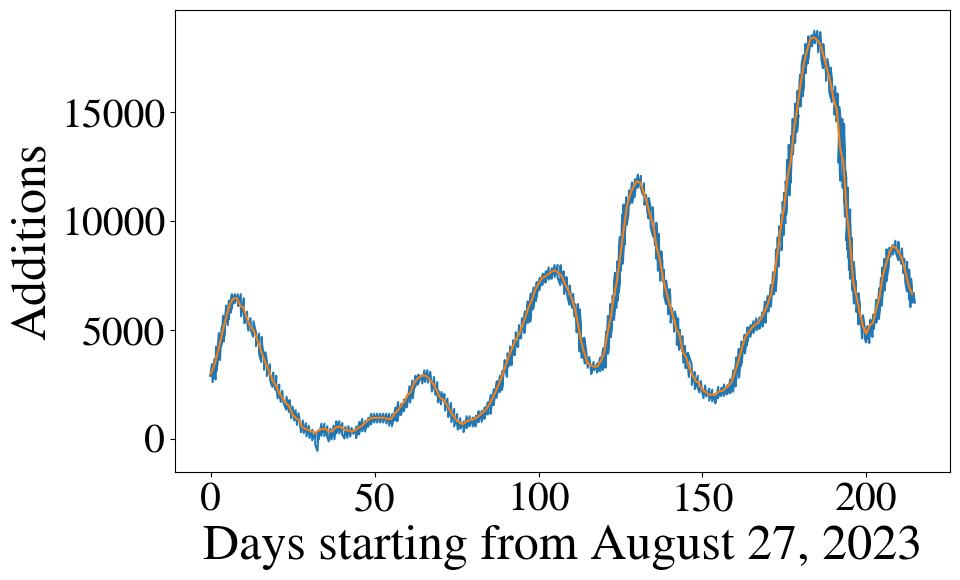

In [151]:
fig,ax = plt.subplots(1,1,figsize = (10,6))

ax.plot(data1[:,0],data1[:,1])
ax.plot(data2[:,0],data2[:,1])

ax.set_xlabel('Days starting from August 27, 2023', fontsize = 36)
ax.set_ylabel('Additions', fontsize = 36)

ax.tick_params(axis='both', labelsize=30)

plt.show()
plt.close()

In [161]:
sp = np.fft.fft(data2[:,1])
freq = np.fft.fftfreq(len(sp),d=1)

freqsNAFF = NAFFlib.get_tunes(data2[:,1], 10)

sp = sp[freq>=0]
freq = freq[freq>=0]

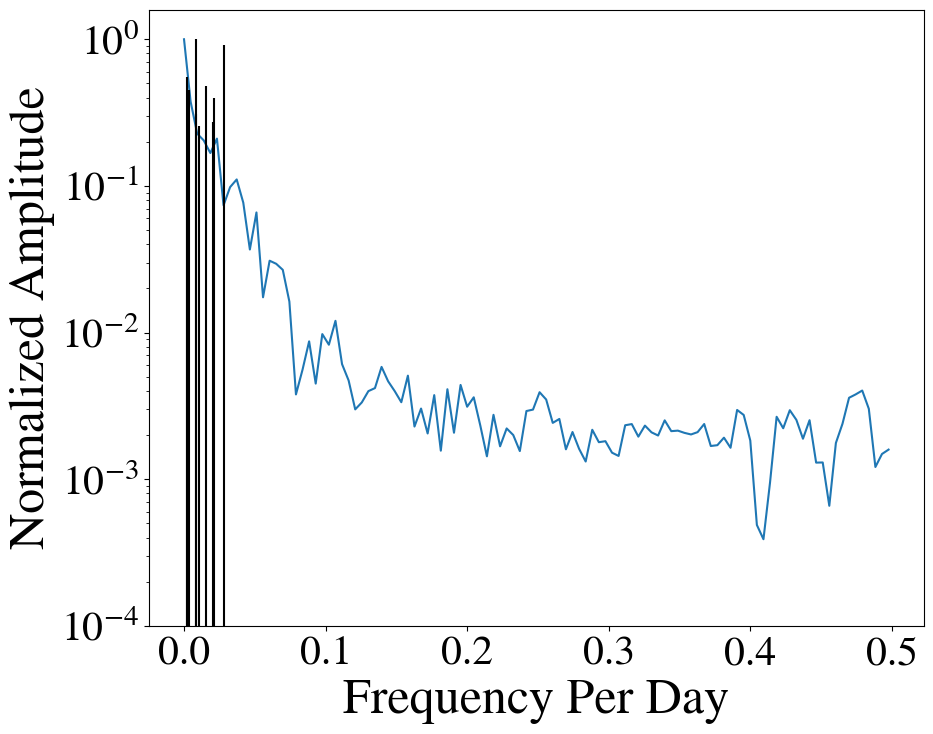

In [162]:
fig,ax = plt.subplots(1,1,figsize = (10,8))

ax.plot(freq, np.abs(sp)/np.max(np.abs(sp)), label = 'FFT')

maxamp = np.max(np.abs(freqsNAFF[1]))
for line,amp in zip(freqsNAFF[0],freqsNAFF[1]):
    markers,stems,base = ax.stem(line,np.abs(amp)/maxamp, label = 'NAFF',
                                 markerfmt=' ', linefmt = 'k-', bottom = 0.0001)


ax.set_yscale('log')
ax.set_ylim(1e-4)

ax.set_xlabel('Frequency Per Day', fontsize = 36)
ax.set_ylabel('Normalized Amplitude', fontsize = 36)

ax.tick_params(axis='both', labelsize=30)

plt.show()
plt.close()

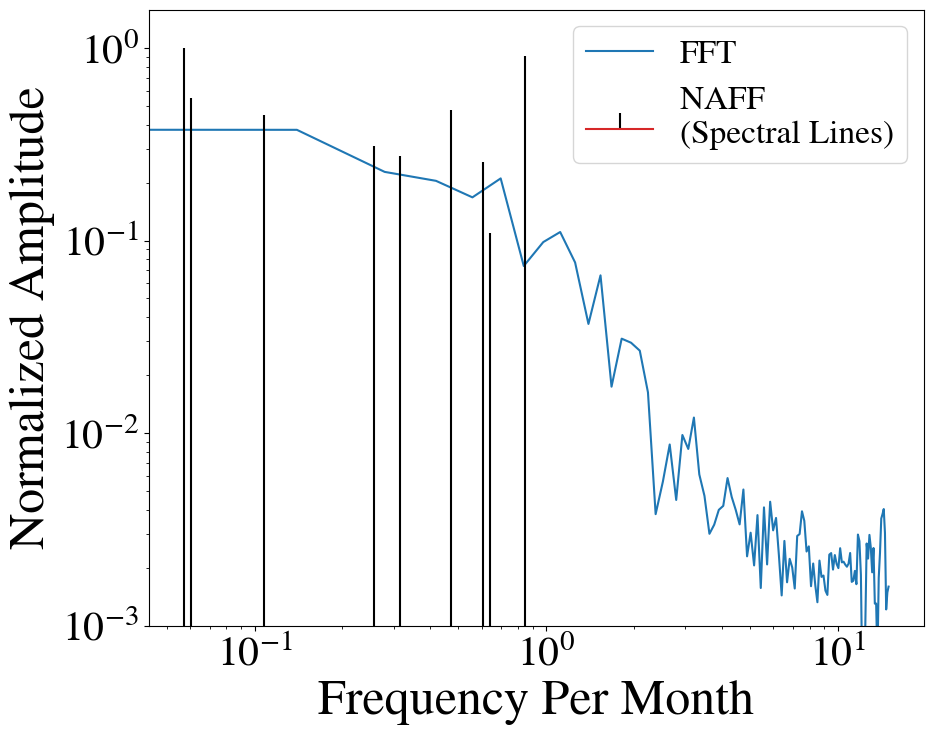

In [168]:
fig,ax = plt.subplots(1,1,figsize = (10,8))

ax.plot(30*freq, np.abs(sp)/np.max(np.abs(sp)), label = 'FFT')

maxamp = np.max(np.abs(freqsNAFF[1]))

for line,amp in zip(np.unique(freqsNAFF[0]),freqsNAFF[1]):
    markers,stems,base = ax.stem(30*line,np.abs(amp)/maxamp, label = 'NAFF \n(Spectral Lines)',
                                 markerfmt=' ', linefmt = 'k-', bottom = 0.0001)

h,l = ax.get_legend_handles_labels()
ax.legend([h[0],h[1]],[l[0],l[1]], fontsize = 24, loc = 1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-3)

ax.set_xlabel('Frequency Per Month', fontsize = 36)
ax.set_ylabel('Normalized Amplitude', fontsize = 36)

ax.tick_params(axis='both', labelsize=30)

plt.show()
plt.close()

In [72]:
freq

array([ 0.        ,  0.00465116,  0.00930233,  0.01395349,  0.01860465,
        0.02325581,  0.02790698,  0.03255814,  0.0372093 ,  0.04186047,
        0.04651163,  0.05116279,  0.05581395,  0.06046512,  0.06511628,
        0.06976744,  0.0744186 ,  0.07906977,  0.08372093,  0.08837209,
        0.09302326,  0.09767442,  0.10232558,  0.10697674,  0.11162791,
        0.11627907,  0.12093023,  0.1255814 ,  0.13023256,  0.13488372,
        0.13953488,  0.14418605,  0.14883721,  0.15348837,  0.15813953,
        0.1627907 ,  0.16744186,  0.17209302,  0.17674419,  0.18139535,
        0.18604651,  0.19069767,  0.19534884,  0.2       ,  0.20465116,
        0.20930233,  0.21395349,  0.21860465,  0.22325581,  0.22790698,
        0.23255814,  0.2372093 ,  0.24186047,  0.24651163,  0.25116279,
        0.25581395,  0.26046512,  0.26511628,  0.26976744,  0.2744186 ,
        0.27906977,  0.28372093,  0.28837209,  0.29302326,  0.29767442,
        0.30232558,  0.30697674,  0.31162791,  0.31627907,  0.32

In [146]:
np.unique(freqsNAFF[0],return_index=True)

(array([0.00202256, 0.00357659, 0.00855741, 0.02027616]), array([1, 2, 0, 4]))